---
title: "Introduction to sampling"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-08"
categories: [python, datacamp, statistics, machine learning, linear regression, logistic regression ]
image: "samplingIntroduction.jpg"

---

# Introduction to sampling

Get a better understanding of what sampling is and why it is so powerful. Additionally, We will learn about the problems associated with convenience sampling and what the difference between true randomness and pseudo-randomness is.

This **Introduction to sampling** is part of [Datacamp course: Introduction to sampling](https://app.datacamp.com/learn/courses/sampling-in-python)

This is my learning experience of data science through DataCamp

In [9]:
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
import numpy as np

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

## Sampling and point estimates

* Population: It is complete dataset
* Sample: It is subset of data you calculate on

Population parameter: It is a calculation on population dataset
Points vs. flavor: population
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
np.mean(pts_vs_flavor_pop['total_cup_points'])

Point estimate: Or sample statistic is a calculation made on sample dataset
Points vs. flavor: 10 row sample
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
np.mean(cup_points_samp)

## Simple sampling with pandas

The purpose of this exercise is to explore Spotify song data. There are over 40,000 rows in this population dataset, each representing a song. These columns include the title of the song, the artists who performed it, the release year, and attributes of the song, such as its duration, tempo, and danceability. To begin, you should examine the durations.

The Spotify dataset will be sampled and the mean duration of the sample will be compared with the mean duration of the population.

In [10]:
spotify_population=pd.read_feather("dataset/spotify_2000_2020.feather")
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [11]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                        artists  danceability  duration_ms  \
23850      0.001130                  ['Lil Wayne']         0.769     199427.0   
41092      0.121000  ['Justin Bieber', 'Big Sean']         0.644     286853.0   
25592      0.000120                     ['O.A.R.']         0.652     207493.0   
15256      0.974000          ["Dustin O'Halloran"]         0.429     188400.0   
40880      0.280000       ['Two Door Cinema Club']         0.731     286093.0   
...             ...                            ...           ...          ...   
5239       0.082500               ['Matt and Kim']         0.549     212560.0   
37135      0.354000                         ['NF']         0.501     221573.0   
36982      0.244000               ['Lil Uzi Vert']         0.626     248175.0   
38148      0.562000    ['Tego Calderon', 'Yandel']         0.848     184480.0   
40085      0.000078                  ['Rammstein']         0.496     235627.0   

       duration_minutes  en

In [12]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)
print("\n Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.")

3.8521519140900073
3.8350666166666665

 Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.


## Simple sampling and calculating with NumPy

In [13]:
# Subset the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Print the sample
print(loudness_samp)

9068     -9.554
16607   -26.071
6391    -10.661
29709    -4.182
32548    -3.494
          ...  
11177    -5.791
18327    -6.229
35183    -5.448
3999    -11.212
38095    -6.221
Name: loudness, Length: 100, dtype: float64


In [15]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)
print("\n Again, notice that the calculated value (the mean) is close but not identical in each case")

-7.366856851353947
-7.382759999999999

 Again, notice that the calculated value (the mean) is close but not identical in each case


## Convenience sampling
Collecting data by easiest method is convenience sampling

Sample bias: sample not true representation of population
Selection bias

## Are findings from the sample generalizable?

In your previous example, you saw that convenience sampling, which is the collection of data using the simplest method, can lead to samples that are not representative of the population. In other words, the findings of the sample cannot be generalized to the entire population. It is possible to determine whether or not a sample is representative of the population by examining the distributions of the population and the sample

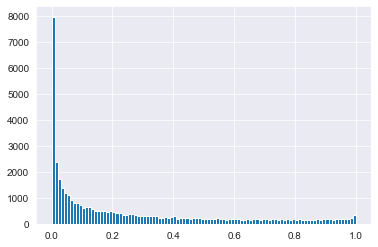

In [16]:
# Visualize the distribution of acousticness with a histogram
width = 0.01
spotify_population['acousticness'].hist(bins=np.arange(0,1.01,width))
plt.show()

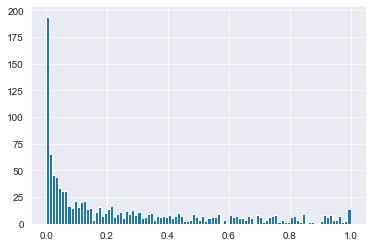

In [17]:
spotify_mysterious_sample=spotify_population.sample(n=1107)
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

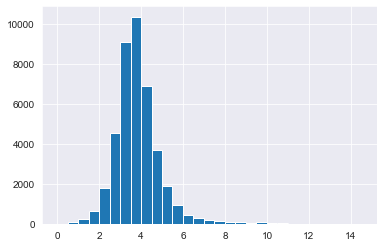

In [18]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,0.5))
plt.show()

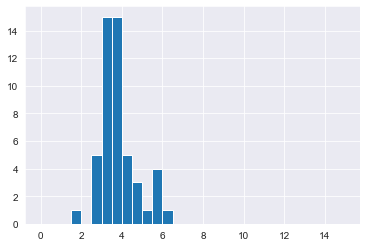

In [19]:
spotify_mysterious_sample2=spotify_population.sample(n=50)
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

## Pseudo-random number generation


[-2.12436214  0.26133352  2.10798367 ... -2.25488851 -1.16266127
 -1.16448391]


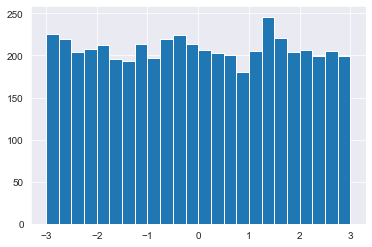

In [23]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25,0.25))
plt.show()

[2.06050457 2.77955126 1.88655315 ... 6.44834334 6.68448638 7.13942115]


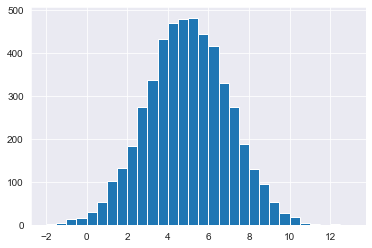

In [24]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5,scale=2,size=5000)

# Print normals
print(normals)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals,np.arange(-2,13.5,0.5))
plt.show()

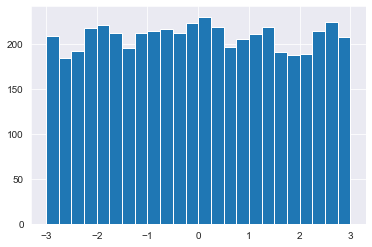